# Module 1 Assignment 1.1 Ian Feekes

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

## Part 1

4422102/4422102 [==============================] - 0s 0us/step


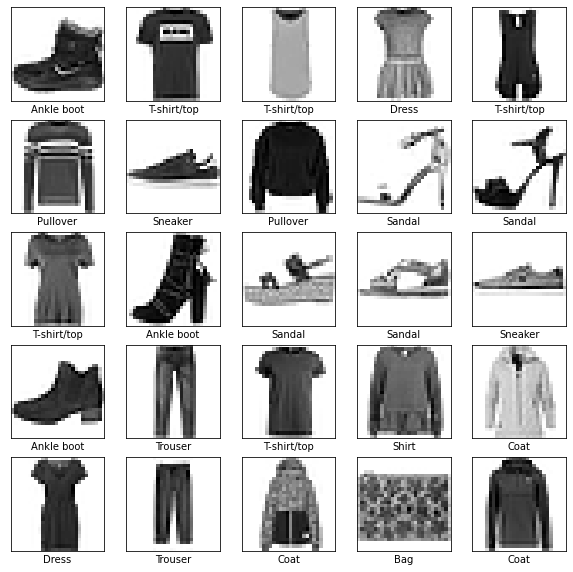

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 4 images as gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1 

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#Create the model here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

In [ ]:
# Train the model here
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 [==============================] - 4s 4ms/step - loss: 0.5711 - accuracy: 0.8064 - val_loss: 0.4688 - val_accuracy: 0.8384
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4190 - accuracy: 0.8535 - val_loss: 0.3960 - val_accuracy: 0.8588
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3744 - accuracy: 0.8678 - val_loss: 0.3760 - val_accuracy: 0.8651
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8762 - val_loss: 0.3882 - val_accuracy: 0.8640
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8796 - val_loss: 0.3678 - val_accuracy: 0.8713
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.8857 - val_loss: 0.3526 - val_accuracy: 0.8738
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3002 - accuracy: 0.8910 - val_loss: 0.3560 - val_accuracy: 0.8694
Epoch 

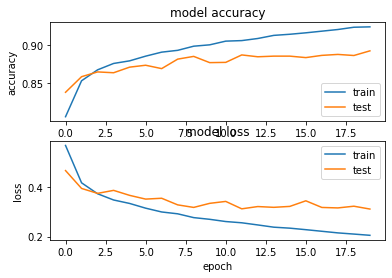

In [ ]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

This model's purpose is performing classification on the clothing image data from fashion.mnist.

This is done through the neural networks' output layer of 10 output neurons, each representing a class that an image most closely represents, activated through softmax activation since this is a problem of categorical classification. 

It has an input layer of images converted to 28x28 fed into a hidden layer of 128 neurons operating on rectified linear unit activation funtions.

Through the 20 epochs the networks is trained with, we can see that the training accuracy quickly reaches over 85% after 2 epochs and quickly sees diminishing returns to slowly rise 7% more over 18 more epochs. The testing accuracy rises at a slightly more constant rate.

The loss function on the other hand, we know shows the number of misclassifications through categorical crossentropy. At the end of training, loss hits a low of 0.2, showing few errors were made for only a few pieces of data.

## Part 2- Image Processing**

The below cell breaks the flow of execution of the notebook isn't using a GPU

In [ ]:
device_name = tf.test.gpu_device_name()
assert(device_name == '/device:GPU:0')

Load the Flower photo dataset from tensorflow repository

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 3s 0us/step


### a) How many Images can we find in this dataset?

The following snippet shows there are 3670 images in the dataset

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))  #This will count all the file with extension of jpg- You have to modify this part
print(image_count)

3670


### b) The list of subfolders are:

*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


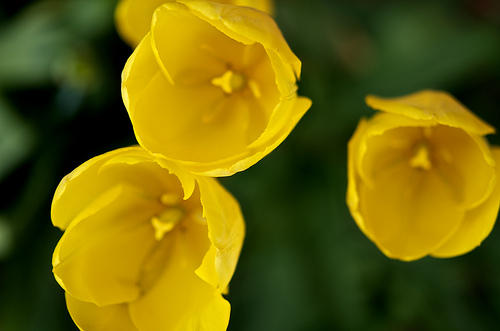

In [ ]:
tulips = list(data_dir.glob('tulips/*'))    # This line stores the list of data in subfolder
PIL.Image.open(str(tulips[2]))              # Use Pillow here to plot the image


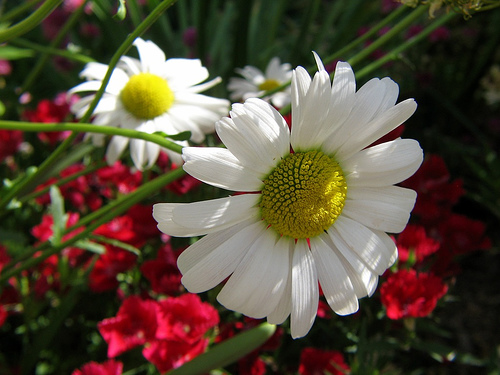

In [ ]:
daisies = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisies[2]))

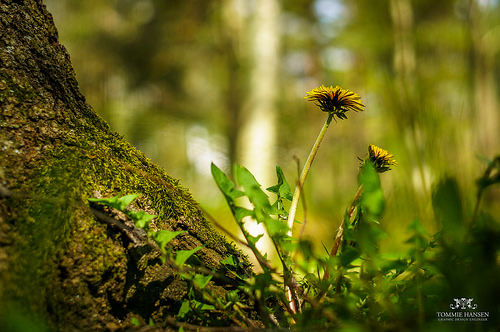

In [ ]:
PIL.Image.open(str(list(data_dir.glob('dandelion/*'))[-1]))

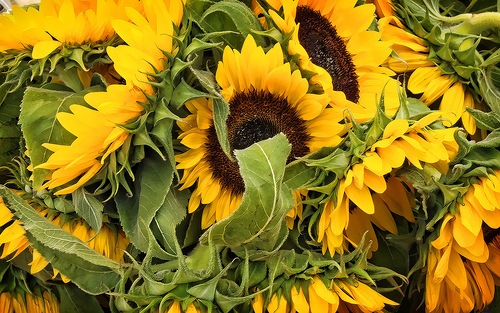

In [ ]:
PIL.Image.open(str(list(data_dir.glob('sunflowers/*'))[10]))

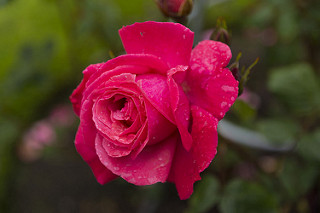

In [ ]:
PIL.Image.open(str(list(data_dir.glob('roses/*'))[-30]))

### c) Use Keras to resize all the images into same dimension 180x180

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Modify following code
train_ds = tf.keras.utils.image_dataset_from_directory( data_dir,
  batch_size = batch_size,
  image_size=(img_height, img_width),
  subset="training",
  seed=42,
  validation_split = .2)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


### d) *You can use* `train_ds.class_names` *command to get the list of labels.*

Write a code to randomly show 9 images from training data while printing their label on top of the image.

In [ ]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

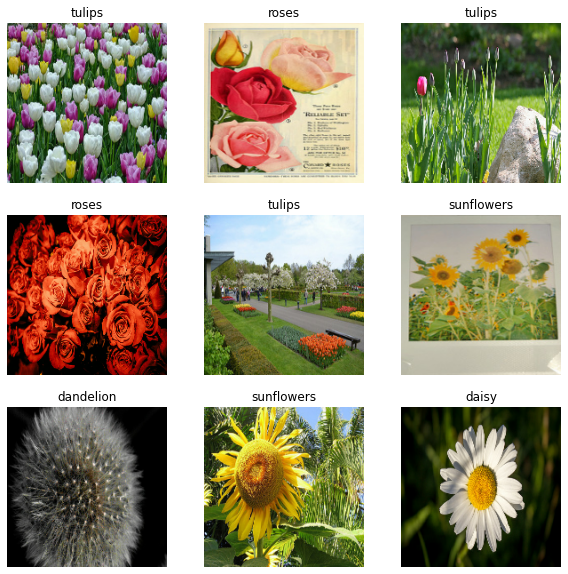

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images[i].numpy()).astype(np.uint8))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### What are some barriers that you can see in images for having a proper classification from the above?

Through converting the images to a certain height and width (180x180 in this case), we can see that images can both be clipped and lose their original aspect ratio.

The dataset initially contained images of varying aspect ratios, sometimes with widths and heights nearing 600 pixels. Data is inevitably lost in standardizing image aspects, but most importantly, the classes we wish for our networks to identify may also become distorted to where they can lead to a an overfitting or misclassifying network.

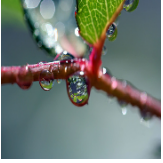 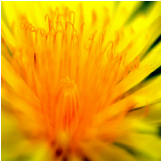 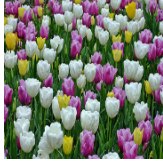 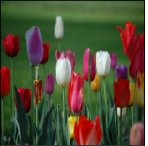

Above are two examples of images that are clipped too much (one of a rose and the next of a dandelion).

These are followed by two examples of some tulips with poor aspect ratios as a result from this resizing mentioned above.

### e) Now, we want to use preprocessing package in Keras to apply different filters to the image. 

Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    rescale= 1.0/255,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(data_dir,
  batch_size = batch_size,
  target_size=(img_height, img_width),
  subset="training",
  seed=42)

Found 3670 images belonging to 5 classes.


## Part 3- OPENCV

 - Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

<Figure size 720x720 with 0 Axes>

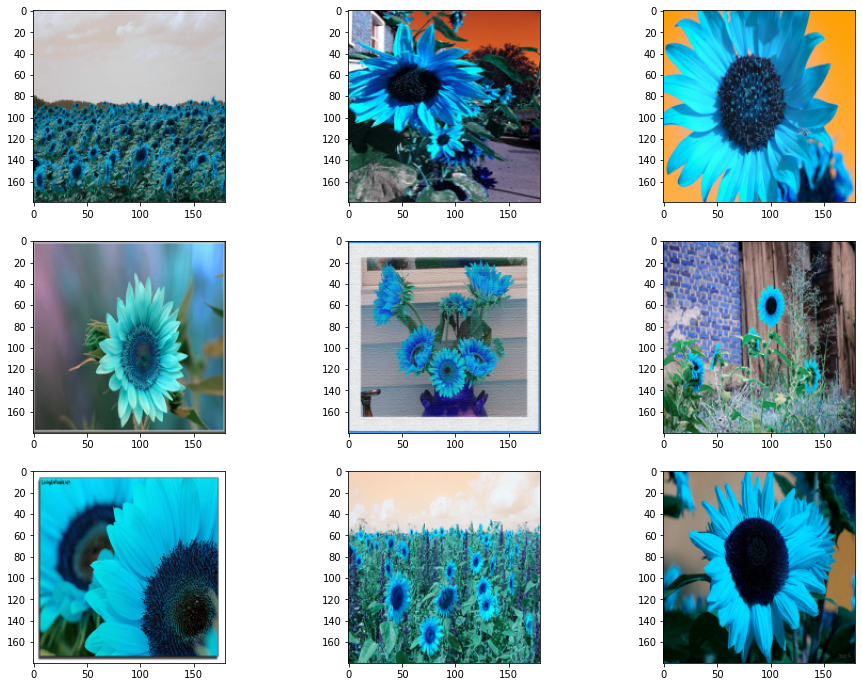

In [ ]:
# Repeat same preprocessing but this time using OpenCV. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.
import cv2
list_of_images= list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    # Set up the subplots
    ax = plt.subplot(3, 3, i + 1)
    # Read the current image and resize it to the desired dimensions
    currImage = cv2.imread(str(list_of_images[i]))
    currImage = cv2.resize(currImage, (180, 180), interpolation = cv2.INTER_AREA)
    # Break flow of execution if it doesn't meet our desired dimensions
    assert(currImage.shape[0]==180)
    assert(currImage.shape[1]==180)
    assert(currImage.shape[2]==3)
    # Show the image
    plt.imshow(currImage)
 
plt.show()


OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

<Figure size 720x720 with 0 Axes>

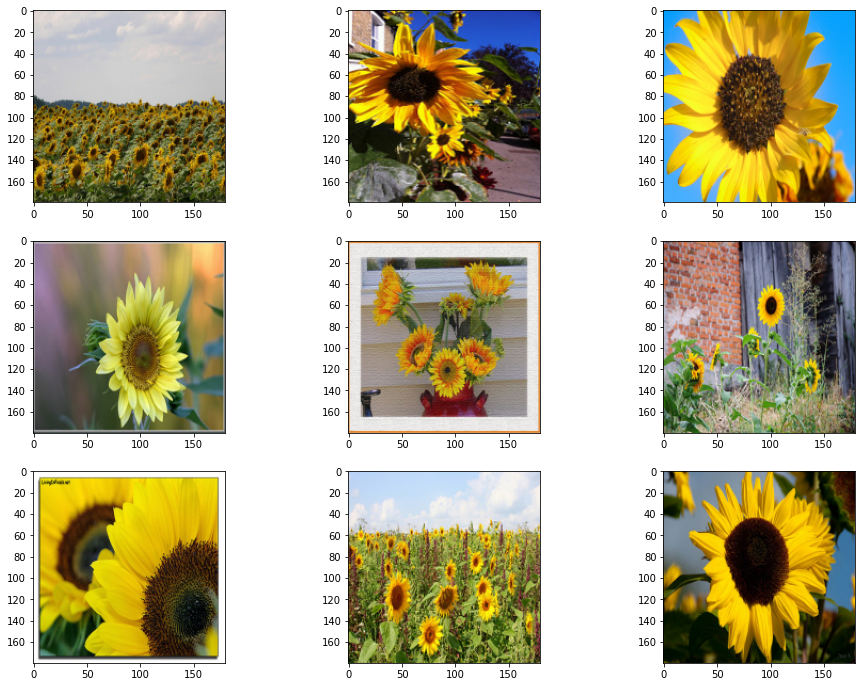

In [ ]:
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    # Set up the subplots
    ax = plt.subplot(3, 3, i + 1)
    # Read the current image
    currImage = cv2.imread(str(list_of_images[i]))
    # Convert to RGB
    currImage = cv2.cvtColor(currImage, cv2.COLOR_BGR2RGB)
    # Resize it to the desired dimensions
    currImage = cv2.resize(currImage, (180, 180), interpolation = cv2.INTER_AREA)
    # Break flow of execution if it doesn't meet our desired dimensions
    assert(currImage.shape[0]==180)
    assert(currImage.shape[1]==180)
    assert(currImage.shape[2]==3)
    # Show the image
    plt.imshow(currImage)
 
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%shell pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%shell sudo apt-get install pandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
%shell sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
%shell jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG1_Ian_Feekes.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Image_Processing/ASG1_Ian_Feekes.ipynb to pdf
[NbConvertApp] Support files will be in ASG1_Ian_Feekes_files/
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Making directory ./ASG1_Ian_Feekes_files
[NbConvertApp] Writing 497032 byt

CalledProcessError: ignored